<a href="https://colab.research.google.com/github/Subhankarbehera1990/DLI/blob/main/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [ ]:
dataset, info = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)
data = dataset['train']


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.ZOCANB_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
train_size = 0.8
train_count = int(info.splits['train'].num_examples * train_size)
test_count = info.splits['train'].num_examples - train_count

train_data = data.take(train_count)
test_data = data.skip(train_count)


In [ ]:
IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

train_data = train_data.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(1)
test_data = test_data.map(preprocess).batch(BATCH_SIZE).prefetch(1)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


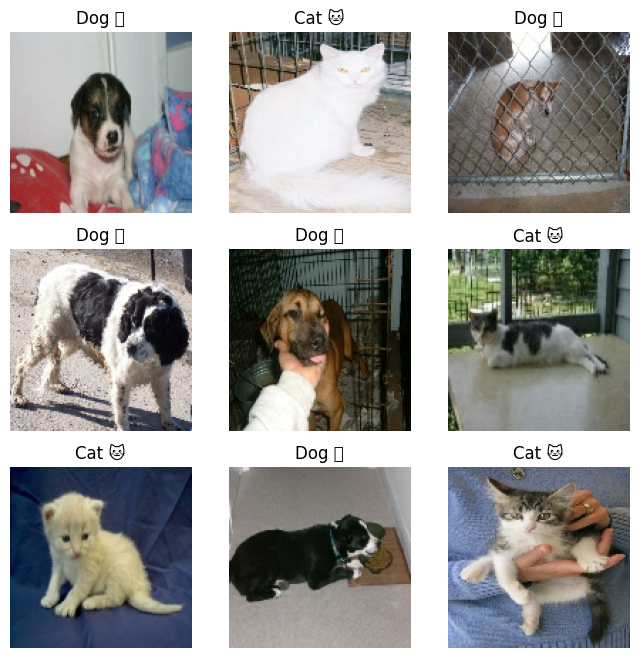

In [ ]:
import matplotlib.pyplot as plt

# Take one batch from training data
for images, labels in train_data.take(1):
    # Unbatch into individual images
    images = images.numpy()
    labels = labels.numpy()

    plt.figure(figsize=(8, 8))
    for i in range(9):  # Display first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # Display the i-th image from the batch
        plt.title("Dog 🐶" if labels[i] == 1 else "Cat 🐱")
        plt.axis("off")
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=test_data)



Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 645s 1s/step - accuracy: 0.6024 - loss: 0.6561 - val_accuracy: 0.7412 - val_loss: 0.5096
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 637s 1s/step - accuracy: 0.7506 - loss: 0.5106 - val_accuracy: 0.7991 - val_loss: 0.4403
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 706s 1s/step - accuracy: 0.8001 - loss: 0.4307 - val_accuracy: 0.8240 - val_loss: 0.3831
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 632s 1s/step - accuracy: 0.8379 - loss: 0.3674 - val_accuracy: 0.8435 - val_loss: 0.3765
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 632s 1s/step - accuracy: 0.8743 - loss: 0.2995 - val_accuracy: 0.8493 - val_loss: 0.3531
Epoch 6/10


KeyboardInterrupt: 

In [ ]:
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc*100:.2f}%")


146/146 ━━━━━━━━━━━━━━━━━━━━ 65s 301ms/step - accuracy: 0.8516 - loss: 0.3498
Test Accuracy: 84.93%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


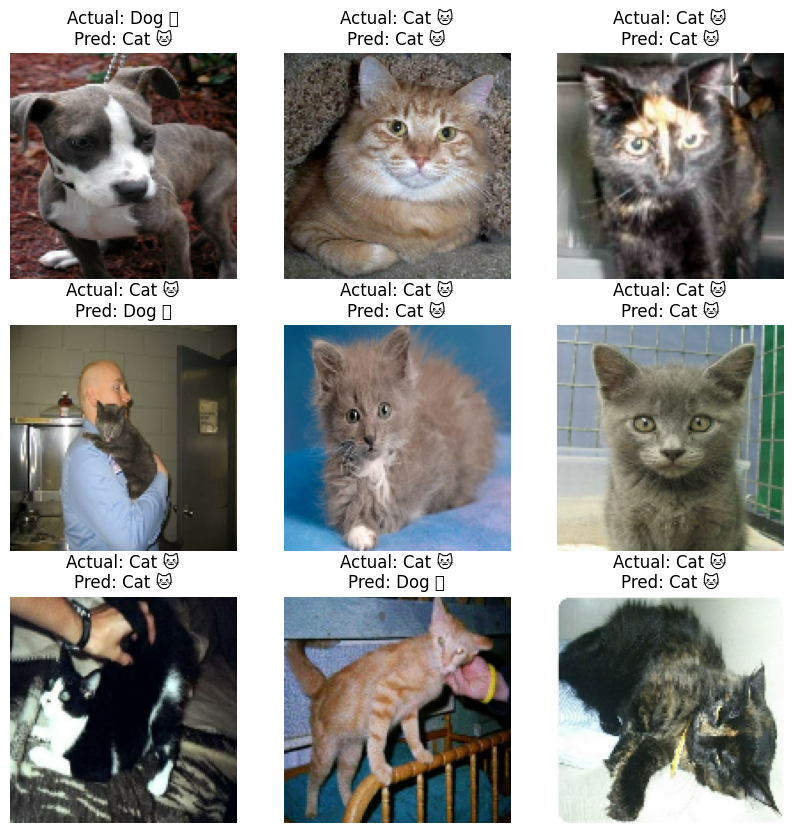

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Take one batch from test data
for images, labels in test_data.take(1):
    preds = model.predict(images)
    preds = np.round(preds).astype(int)  # Convert to 0 or 1

    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        actual = "Dog 🐶" if labels[i] == 1 else "Cat 🐱"
        predicted = "Dog 🐶" if preds[i] == 1 else "Cat 🐱"
        plt.title(f"Actual: {actual}\nPred: {predicted}")
        plt.axis("off")
    plt.show()


In [ ]:
model.save("cats_dogs_cnn.h5")
# Later
from tensorflow.keras.models import load_model
model = load_model("cats_dogs_cnn.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("cats_dogs_cnn.h5")

print("✅ Model loaded successfully!")
model.summary()


✅ Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,771 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/cat.jpg -O cat.jpg


--2025-10-04 18:12:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-10-04 18:12:33 ERROR 404: Not Found.



In [ ]:
#instant image test
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load a test image (replace with your file)
img_path = "cat.jpg"  # or "dog.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

# Show image + result
plt.imshow(image.load_img(img_path))
plt.axis("off")

if prediction[0][0] > 0.5:
    plt.title("🐶 Predicted: Dog")
    print("Model Prediction: Dog 🐶")
else:
    plt.title("🐱 Predicted: Cat")
    print("Model Prediction: Cat 🐱")

plt.show()


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7dc5a60eb920>

In [ ]:
!rm -f cat.jpg


In [ ]:
!wget https://cdn.pixabay.com/photo/2017/11/09/21/41/cat-2934720_1280.jpg -O cat.jpg


--2025-10-04 18:17:13--  https://cdn.pixabay.com/photo/2017/11/09/21/41/cat-2934720_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.40.96, 172.64.147.160, 2606:4700:4400::ac40:93a0, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.40.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234292 (229K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 228.80K  --.-KB/s    in 0.004s  

2025-10-04 18:17:14 (62.3 MB/s) - ‘cat.jpg’ saved [234292/234292]



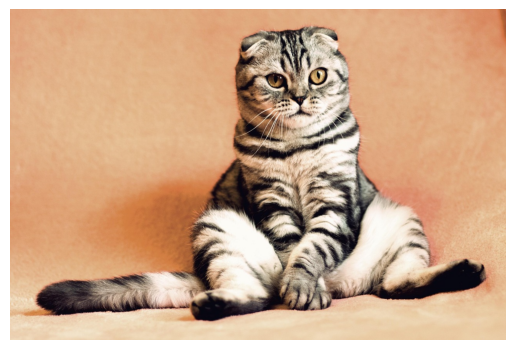

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = Image.open("cat.jpg")

# Display inline
plt.imshow(img)
plt.axis("off")  # hide axes
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


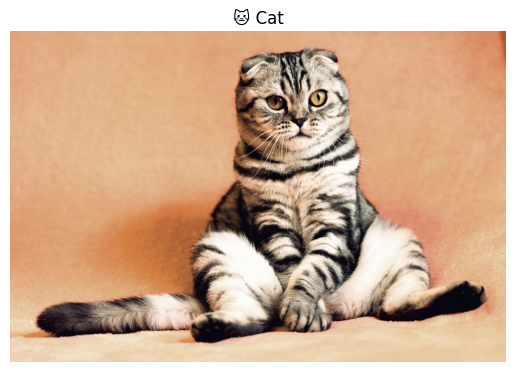

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = "cat.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

plt.imshow(Image.open(img_path))
plt.axis("off")
plt.title("🐶 Dog" if prediction[0][0] > 0.5 else "🐱 Cat")
plt.show()
